# Final project
## Analysis of human emotions over ukraine-russia war on first 65 days

## Dataset
This dataset consist of tweets on ukraine-russia war with over 230K data points

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\rohit\Downloads\Ukraine_war\Ukraine_war.csv')
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/ksenijapavlovic/status/150...,2022-03-05 23:59:58+00:00,There was an anti war protest for #Ukraine as ...,There was an anti war protest for #Ukraine as ...,1500259859937337349,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,4,25,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,['Ukraine'],NaN,Ukraine war
1,snscrape.modules.twitter.Tweet,https://twitter.com/ty_phoon31/status/15002598...,2022-03-05 23:59:58+00:00,https://t.co/Z1pURKlNHu NATO followed USA into...,abc.net.au/news/2022-03-0… NATO followed USA i...,1500259857160568834,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
2,snscrape.modules.twitter.Tweet,https://twitter.com/ann_peace22/status/1500259...,2022-03-05 23:59:54+00:00,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,1500259841520111616,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500182e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['IStandWithUkraine'],NaN,Ukraine war
3,snscrape.modules.twitter.Tweet,https://twitter.com/GardensR4Health/status/150...,2022-03-05 23:59:52+00:00,@nytimes This war could have been avoided by e...,@nytimes This war could have been avoided by e...,1500259833915883525,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.499516e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
4,snscrape.modules.twitter.Tweet,https://twitter.com/kbrunolieber/status/150025...,2022-03-05 23:59:52+00:00,@ggreenwald Remember the biggest mistake made ...,@ggreenwald Remember the biggest mistake made ...,1500259832649203713,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500200e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war


In [2]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

## Here we have removed the unnecessary column from the data

In [3]:
df = df.drop(['_type', 'url', 'date', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'], axis = 1)

In [4]:
df.head()

,content,likeCount
0,There was an anti war protest for #Ukraine as ...,25
1,https://t.co/Z1pURKlNHu NATO followed USA into...,0
2,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,0
3,@nytimes This war could have been avoided by e...,0
4,@ggreenwald Remember the biggest mistake made ...,2


## data availability 

In [5]:
df.isna().sum()

content      0
likeCount    0
dtype: int64

# Cleaning dataset

In [6]:
import regex as re
import nltk

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
stopwords.add('s')
stopwords.add('a')
stopwords.add('t')


def cleanTxt(text):
    text = re.sub(r'http\S+', '', text)  # replace URLs with <URL> token
    text = re.sub(r'#\w+', lambda x: x.group().lower(), text)  # lowercase hashtags
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]])\]\([^\(\)]\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    #text = re.sub(r'\s+', ' ', text)
    return text

def tokenize(text):
    return [t for t in re.findall(r'\b\w+\b', text) if not t.isdigit()]

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

## Creating pipeline

In [8]:
pipeline = [ tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [9]:
df['content'] = df['content'].apply(cleanTxt)
df['tokens'] = df['content'].apply(prepare, pipeline=pipeline)

In [10]:
df.head()

,content,likeCount,tokens
0,There was an anti war protest for #ukraine as ...,25,"[anti, war, protest, ukraine, getting, headlin..."
1,"NATO followed USA into Afghanistan, forgotten...",0,"[NATO, followed, USA, Afghanistan, forgotten, ..."
2,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,0,"[mfa_russia, RusEmbUSA, RussiaUN, MFA_Ukraine,..."
3,@nytimes This war could have been avoided by e...,0,"[nytimes, war, avoided, ensuring, Putin, Ukrai..."
4,@ggreenwald Remember the biggest mistake made ...,2,"[ggreenwald, Remember, biggest, mistake, suppo..."


# Frequency analysis

In [11]:
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('Ukraine', 220681), ('war', 208266), ('Russia', 104260), ('Putin', 39027), ('War', 36284)]


In [12]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [13]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
Ukraine,220681
war,208266
Russia,104260
Putin,39027
War,36284
ukraine,33065
NATO,28502
Russian,25217
amp,22552


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

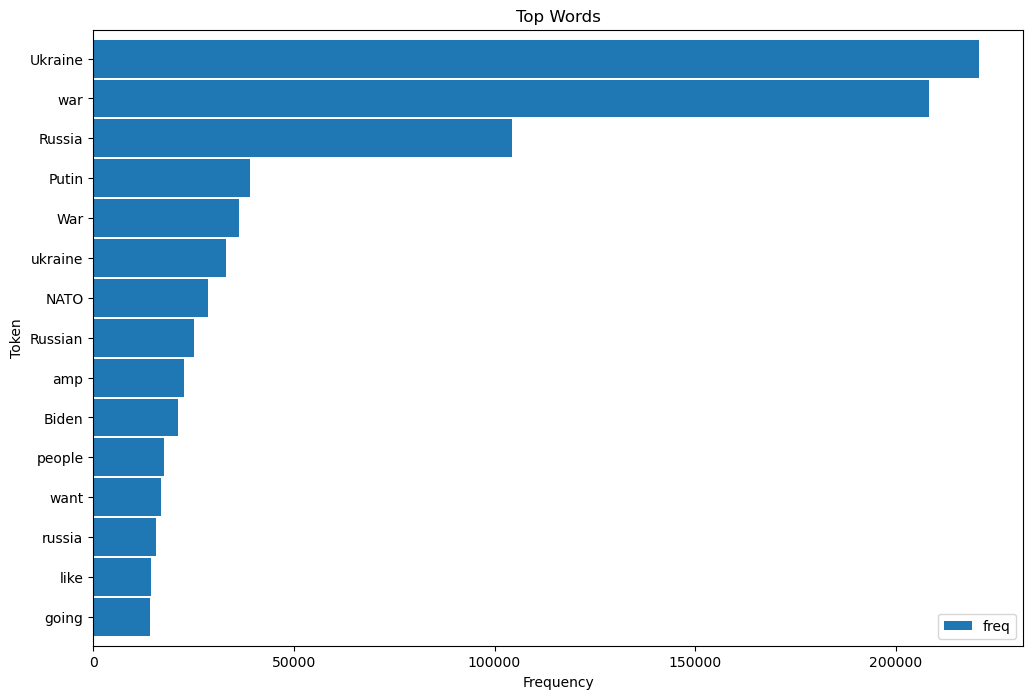

In [14]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# WordCloud

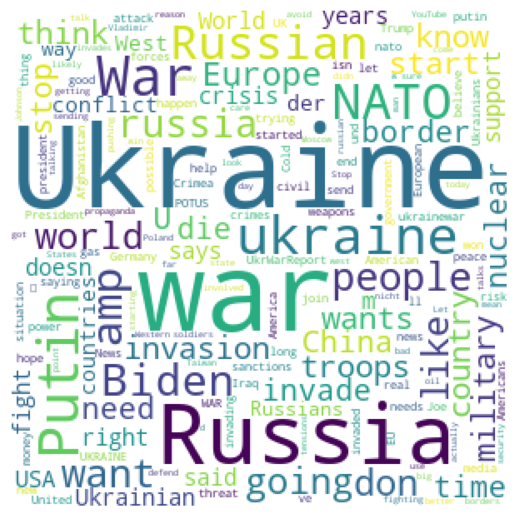

In [15]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Sentimental analysis

In [16]:
from nltk.corpus import opinion_lexicon
nltk.download('punkt')

pos_score = 1
neg_score = -1
word_dict = {}

for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

for word in opinion_lexicon.negative():
    word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
from nltk.tokenize import word_tokenize

def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

In [18]:
df['Bing_Liu_Score'] = df['content'].apply(bing_liu_score)

In [19]:
sentiment = []

for i in df['Bing_Liu_Score']:
    if i == 0:
        sentiment.append('neutral')
    elif i > 0:
        sentiment.append('Positive')
    else:
        sentiment.append('Negetive')
df['Sentiment'] = sentiment

df.head()

,content,likeCount,tokens,Bing_Liu_Score,Sentiment
0,There was an anti war protest for #ukraine as ...,25,"[anti, war, protest, ukraine, getting, headlin...",2,Positive
1,"NATO followed USA into Afghanistan, forgotten...",0,"[NATO, followed, USA, Afghanistan, forgotten, ...",-1,Negetive
2,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,0,"[mfa_russia, RusEmbUSA, RussiaUN, MFA_Ukraine,...",-1,Negetive
3,@nytimes This war could have been avoided by e...,0,"[nytimes, war, avoided, ensuring, Putin, Ukrai...",0,neutral
4,@ggreenwald Remember the biggest mistake made ...,2,"[ggreenwald, Remember, biggest, mistake, suppo...",0,neutral


In [20]:
print(df.groupby(['Sentiment']).count().reset_index())

  Sentiment  content  likeCount  tokens  Bing_Liu_Score
0  Negetive   105534     105534  105534          105534
1  Positive    47182      47182   47182           47182
2   neutral    78908      78908   78908           78908


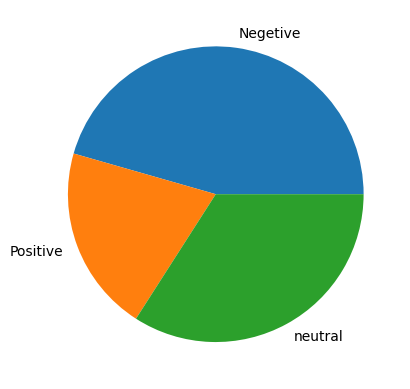

In [21]:
import matplotlib.pyplot as plt

labels = df.groupby(['Sentiment']).count().reset_index()['Sentiment']

plt.pie(df.groupby(['Sentiment']).count().reset_index()['content'], labels = labels)

plt.show()

## According to this dataset, we have represented the  piechart which shows the most reviews are on negative for this war. The next following is neutral and the positive has the least count among three counts.

# TFIDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

tfidf_para_vectorizer = TfidfVectorizer(stop_words=list(stopwords),min_df=5, max_df=0.7)
tfidf_para_vectors =tfidf_para_vectorizer.fit_transform(df["content"])
tfidf_para_vectors.shape

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(231624, 31766)

## NMF

In [23]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_text_matrix = nmf_text_model.components_

In [24]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))
display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out()) 


Topic 00
  russia (10.59)
  invade (0.78)
  china (0.62)
  west (0.55)
  usa (0.55)

Topic 01
  ukrwarreport (39.86)
  lol (0.87)
  lookner (0.80)
  like (0.39)
  source (0.39)

Topic 02
  putin (11.38)
  vladimir (1.43)
  wants (1.15)
  stop (0.71)
  invade (0.68)

Topic 03
  nato (10.77)
  join (1.52)
  nuclear (1.13)
  member (0.94)
  joining (0.89)

Topic 04
  want (10.67)
  don (7.17)
  doesn (2.24)
  think (1.51)
  know (1.16)

Topic 05
  biden (9.49)
  president (1.83)
  joe (1.72)
  trump (1.02)
  wants (0.94)

Topic 06
  crisis (5.92)
  says (4.73)
  europe (4.22)
  news (2.64)
  fears (1.86)

Topic 07
  die (4.11)
  der (3.26)
  und (2.07)
  das (1.62)
  nicht (1.39)

Topic 08
  russian (5.11)
  invasion (1.75)
  troops (1.27)
  border (0.81)
  ukrainian (0.80)

Topic 09
  world (1.84)
  amp (1.65)
  going (1.56)
  people (1.20)
  like (0.95)


## LDA

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(df["content"])
count_para_vectors.shape
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [26]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
  russia (6.18)
  putin (2.19)
  russian (1.94)
  nato (1.39)
  invasion (1.26)

Topic 01
  russian (3.38)
  russia (2.73)
  troops (1.56)
  putin (1.38)
  people (1.13)

Topic 02
  russia (1.67)
  media (1.20)
  uk (0.84)
  time (0.84)
  weapons (0.83)

Topic 03
  ukrwarreport (3.58)
  ukrainewar (3.38)
  russia (1.61)
  false (1.34)
  flag (1.00)

Topic 04
  russia (2.58)
  russian (1.12)
  amp (0.91)
  like (0.66)
  putin (0.65)

Topic 05
  biden (3.88)
  russia (2.55)
  putin (1.93)
  like (1.28)
  want (1.06)

Topic 06
  russia (5.81)
  nato (3.99)
  putin (2.06)
  want (1.25)
  world (1.01)

Topic 07
  people (3.01)
  russia (2.38)
  world (1.64)
  peace (0.83)
  like (0.76)

Topic 08
  russia (4.77)
  china (2.34)
  amp (1.97)
  gas (1.36)
  oil (1.16)

Topic 09
  die (6.15)
  der (4.10)
  und (2.54)
  das (1.93)
  nicht (1.61)


In [27]:
import pyLDAvis.lda_model

lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

# Wordcloud for topics

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\rohit\AppData\Local\Temp\ipykernel_17864\3253276570.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


C:\Users\rohit\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\rohit\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\rohit\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\U

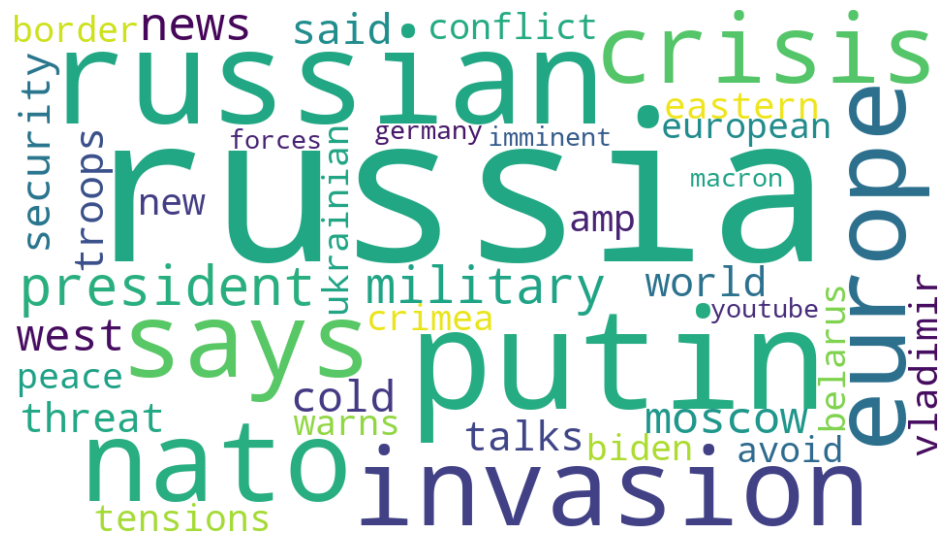

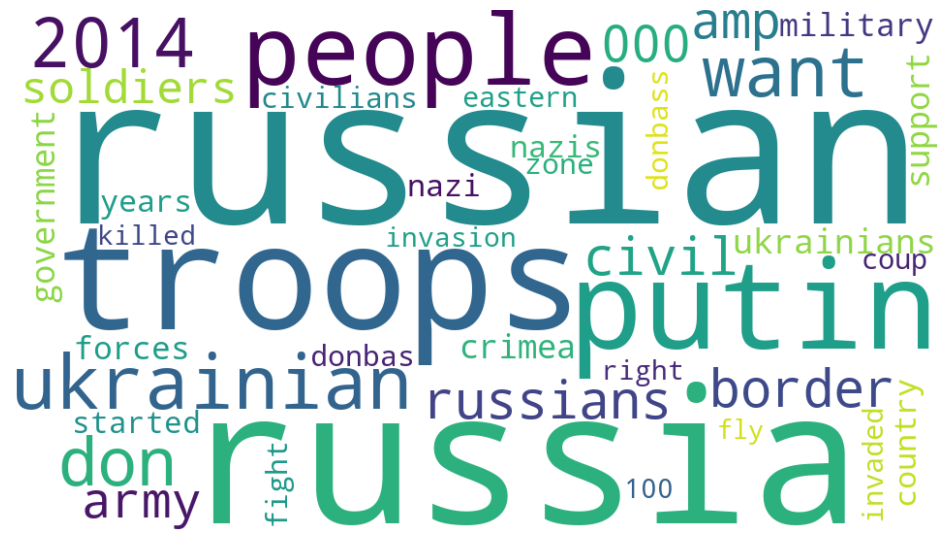

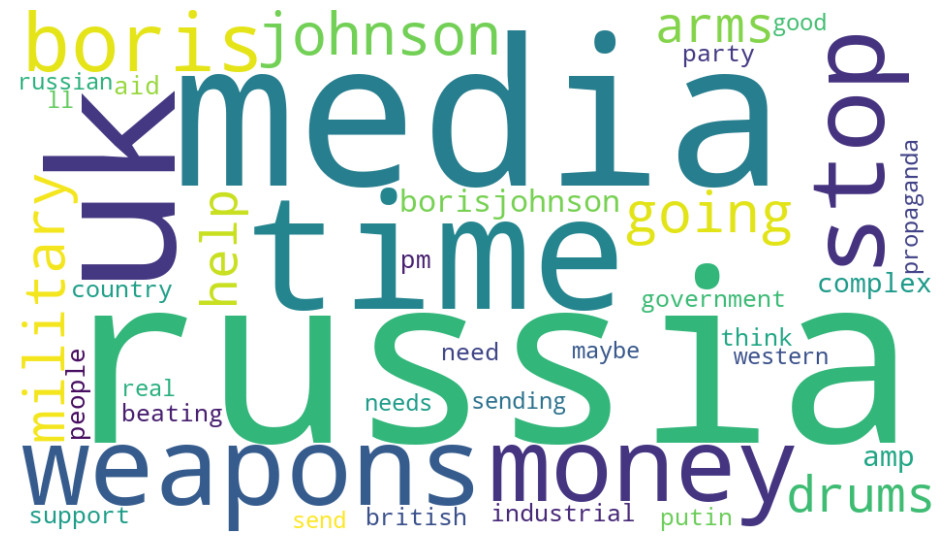

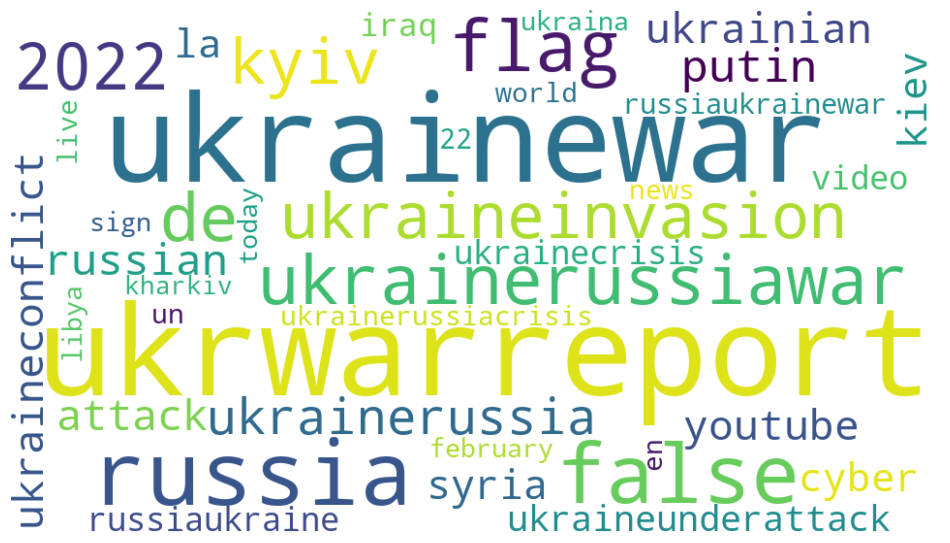

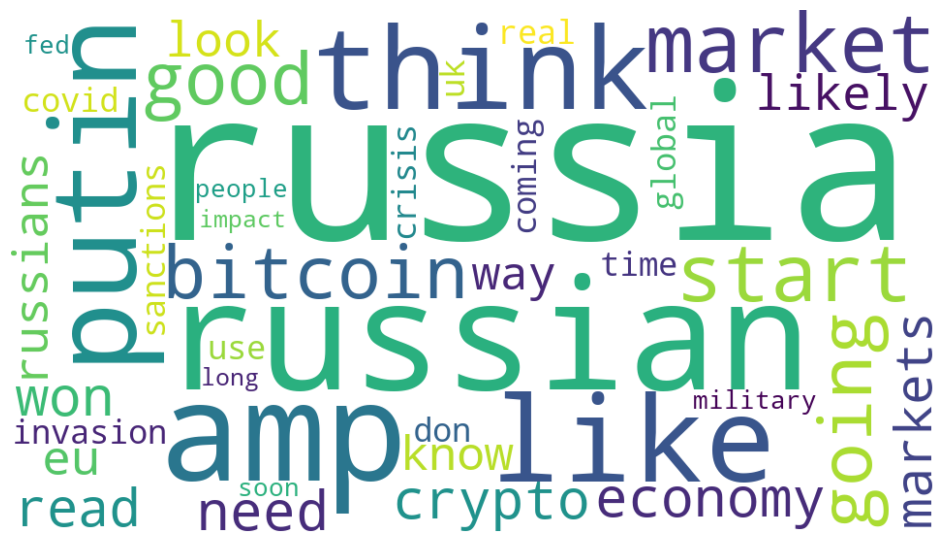

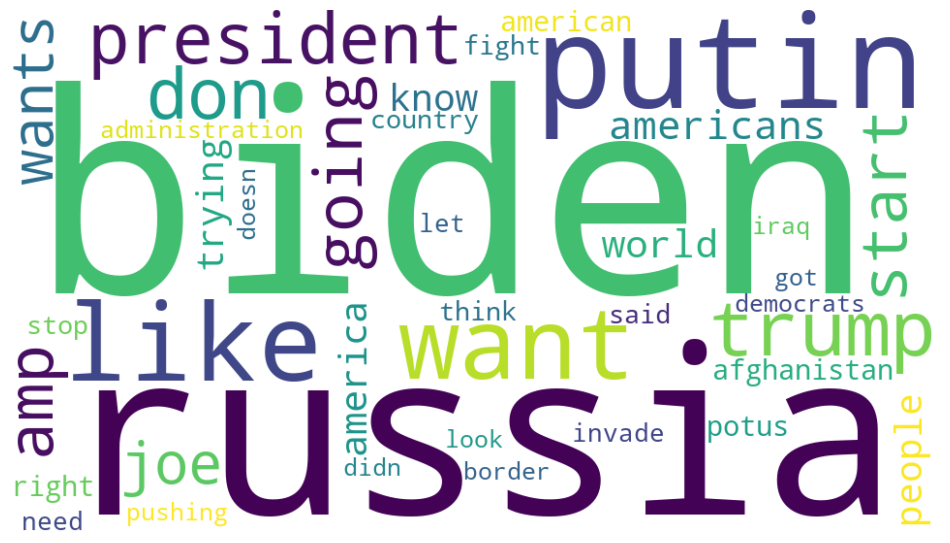

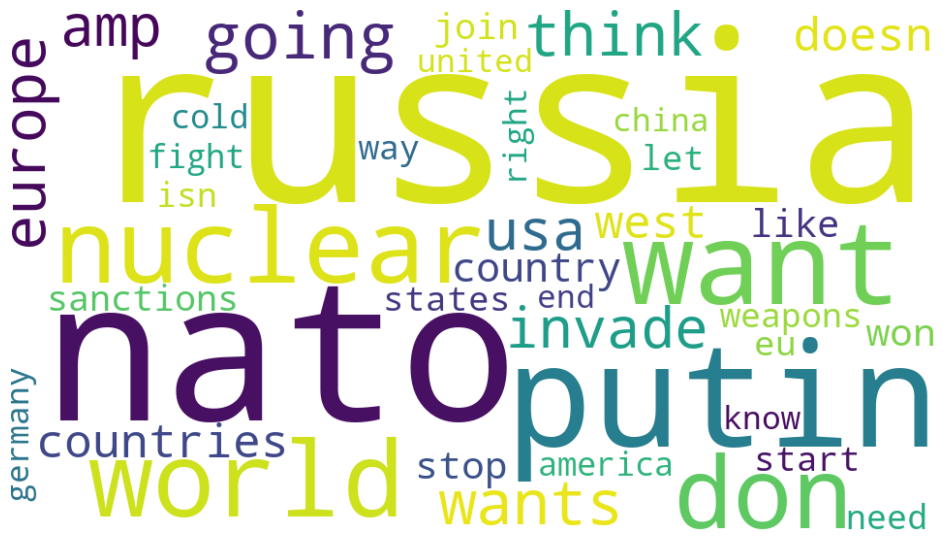

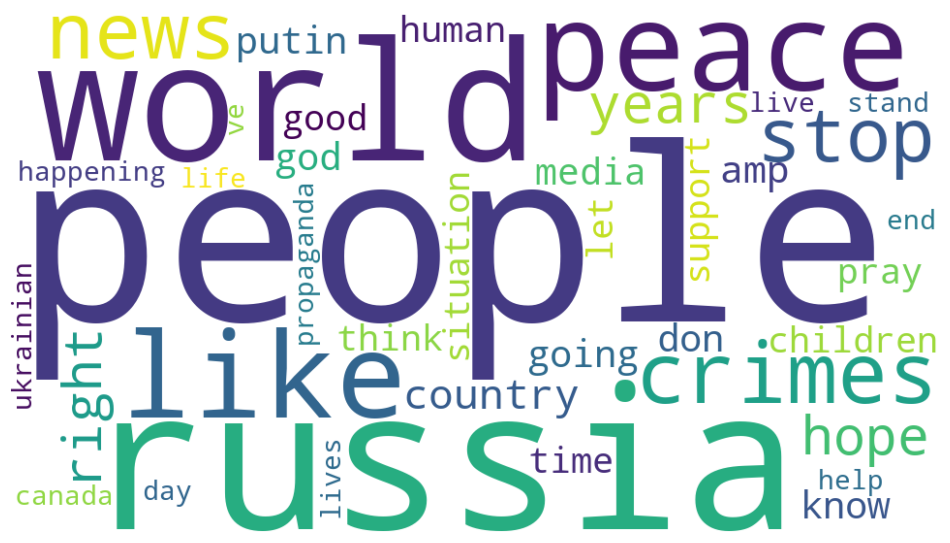

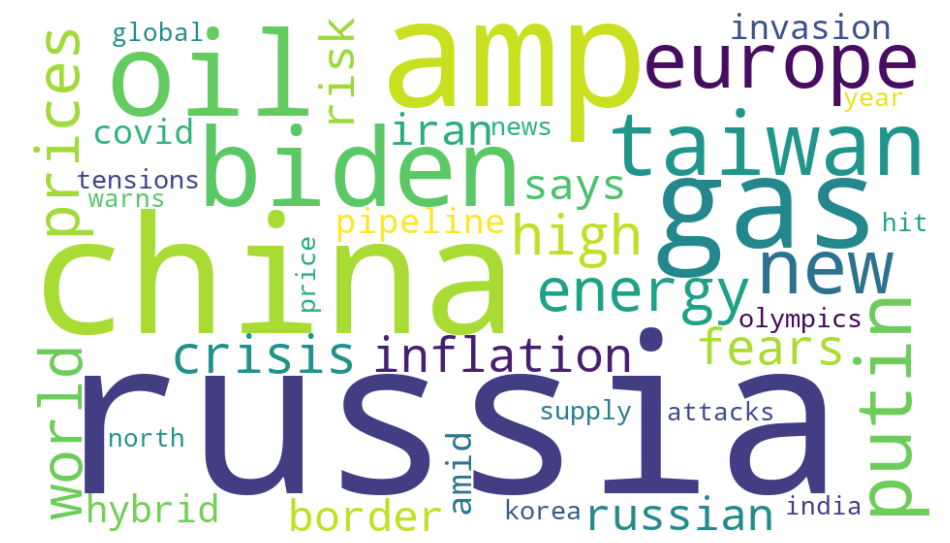

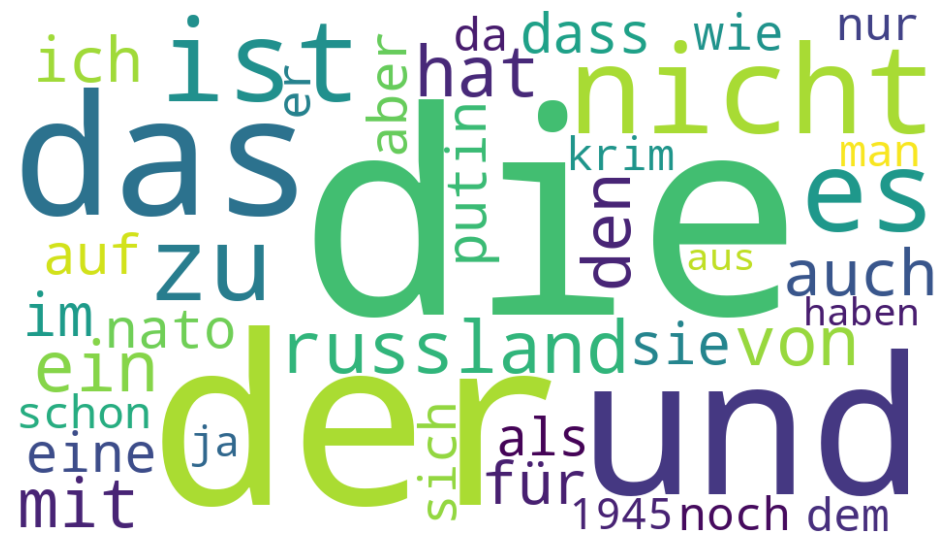

In [29]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())